# Linear regression and saving the models using pickle and joblib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## House price prediction 

In [4]:
df=pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price(US$)')

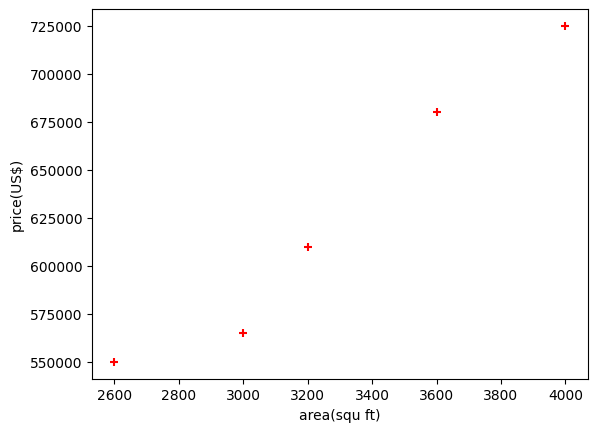

In [8]:
plt.scatter(df.area,df.price,color="red",marker="+")
plt.xlabel("area(squ ft)")
plt.ylabel("price(US$)")

In [13]:
reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

In [16]:
reg.predict([[3300]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [58]:
x=df[["area"]]
p=reg.predict(x)

In [59]:
df["predict"]=p
df

,area,price,predict
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


In [20]:
m=reg.coef_
m

array([135.78767123])

In [21]:
b=reg.intercept_
b

180616.43835616432

In [22]:
x=3300
y=(m*x)+b
y

array([628715.75342466])

In [24]:
reg.predict([[5000]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [27]:
d=pd.read_csv("areas.csv")
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [28]:
p=reg.predict(d)

In [29]:
d["price"]=p

In [30]:
d

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [63]:
actual_price=df["price"]
predict_price=df["predict"]
mae=mean_absolute_error(actual_price,predict_price)
mse=mean_squared_error(actual_price,predict_price)
rase=np.sqrt(mse)
r2=r2_score(actual_price,predict_price)

In [65]:
print("mean absolute error",mae)
print("mean squared error",mse)
print("root mean squared error",rase)
print("r square",r2)

mean absolute error 11246.57534246575
mean squared error 186815068.4931509
root mean squared error 13668.030893042014
r square 0.9584301138199486


### Net income prediction  of canada

In [5]:
data=pd.read_csv("canada_per_capita_income.csv")
data.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'income(US$)')

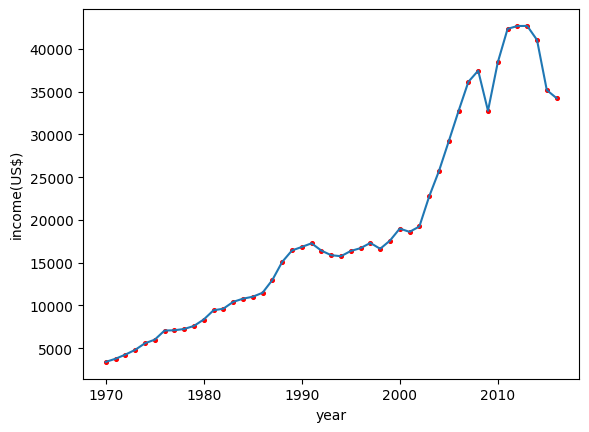

In [6]:
plt.plot(data.year, data.income)
plt.scatter(data.year,data.income, color= "red",s=7)
plt.xlabel("year")
plt.ylabel("income(US$)")

In [7]:
rg=linear_model.LinearRegression()
rg.fit(data[["year"]],data.income)

LinearRegression()

In [8]:
rg.predict([[2000]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24719.39258996])

In [13]:
pred=rg.predict(data[["year"]])
pred

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [16]:
data["predicted_values"]=pred
data.head()

,year,income,predicted_values
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634


In [15]:
import pickle

In [17]:
with open("model_pickle","wb") as f:
    pickle.dump(rg,f)

In [19]:
with open ("model_pickle","rb") as f:
    mp=pickle.load(f)

In [20]:
mp.predict([[5000]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2510114.61825809])

In [22]:
!pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import joblib

In [24]:
joblib.dump(rg,"model_joblib")

['model_joblib']

In [25]:
mj=joblib.load("model_joblib")

In [26]:
mj.predict([[4000]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1681649.54303538])

In [27]:
mj.coef_

array([828.46507522])

In [28]:
mj.intercept_

-1632210.7578554575